<a href="https://colab.research.google.com/github/Trishag04/image_classification-CNN-MODEL/blob/main/image_classification_CNN_MODEL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/traffic-signs-preprocessed.zip" /content/

In [ ]:
!ls
!unzip -q "/content/traffic-signs-preprocessed.zip"
!ls

drive  sample_data  traffic-signs-preprocessed.zip
data0.pickle  data8.pickle	      std_gray.pickle
data1.pickle  datasets_preparing.py   std_rgb.pickle
data2.pickle  drive		      test.pickle
data3.pickle  label_names.csv	      traffic-signs-preprocessed.zip
data4.pickle  labels.pickle	      train.pickle
data5.pickle  mean_image_gray.pickle  valid.pickle
data6.pickle  mean_image_rgb.pickle
data7.pickle  sample_data


In [ ]:
#opening a pickle file
import pickle

with open("train.pickle", "rb") as f:
    train_data = pickle.load(f)

print(type(train_data))
if isinstance(train_data, dict):
    print(train_data.keys())


<class 'dict'>
dict_keys(['coords', 'labels', 'features', 'sizes'])


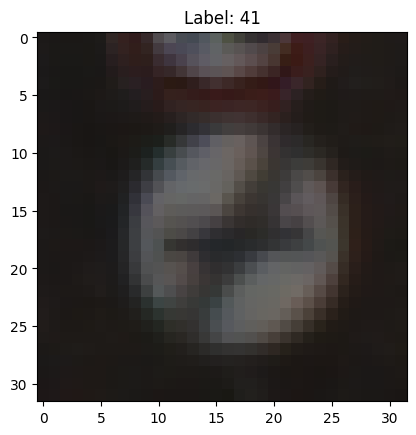

In [ ]:
#viewing sample img
import matplotlib.pyplot as plt

X_train = train_data['features']
y_train = train_data['labels']

plt.imshow(X_train[0])
plt.title(f"Label: {y_train[0]}")
plt.show()


In [ ]:
#dataset shape
print("Train:", X_train.shape, y_train.shape)


Train: (34799, 32, 32, 3) (34799,)


In [ ]:
#preprocess the data
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load data
X = train_data['features']
y = train_data['labels']

# Normalize pixel values (0–255 → 0–1)
X = X / 255.0

# One-hot encode labels
y = to_categorical(y)

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)


Training set: (27839, 32, 32, 3)
Validation set: (6960, 32, 32, 3)


In [ ]:
#building cnn model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')  # output neurons = number of classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,355 (645.92 KB)

 Trainable params: 164,907 (644.17 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
#training model
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(X_val, y_val)
)


Epoch 1/15
435/435 ━━━━━━━━━━━━━━━━━━━━ 77s 168ms/step - accuracy: 0.4471 - loss: 2.1904 - val_accuracy: 0.8162 - val_loss: 0.6192
Epoch 2/15
435/435 ━━━━━━━━━━━━━━━━━━━━ 74s 170ms/step - accuracy: 0.9378 - loss: 0.2067 - val_accuracy: 0.9843 - val_loss: 0.0610
Epoch 3/15
435/435 ━━━━━━━━━━━━━━━━━━━━ 70s 162ms/step - accuracy: 0.9751 - loss: 0.0861 - val_accuracy: 0.9853 - val_loss: 0.0483
Epoch 4/15
435/435 ━━━━━━━━━━━━━━━━━━━━ 70s 160ms/step - accuracy: 0.9823 - loss: 0.0609 - val_accuracy: 0.9943 - val_loss: 0.0217
Epoch 5/15
435/435 ━━━━━━━━━━━━━━━━━━━━ 69s 158ms/step - accuracy: 0.9877 - loss: 0.0431 - val_accuracy: 0.9806 - val_loss: 0.0608
Epoch 6/15
435/435 ━━━━━━━━━━━━━━━━━━━━ 81s 186ms/step - accuracy: 0.9890 - loss: 0.0364 - val_accuracy: 0.9907 - val_loss: 0.0299
Epoch 7/15
435/435 ━━━━━━━━━━━━━━━━━━━━ 69s 159ms/step - accuracy: 0.9896 - loss: 0.0336 - val_accuracy: 0.9932 - val_loss: 0.0259
Epoch 8/15
435/435 ━━━━━━━━━━━━━━━━━━━━ 66s 151ms/step - accuracy: 0.9927 - loss: 0

In [ ]:
#evalution of test data
with open("test.pickle", "rb") as f:
    test_data = pickle.load(f)

X_test = test_data['features'] / 255.0
y_test = to_categorical(test_data['labels'])

test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

395/395 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9577 - loss: 0.2113
Test accuracy: 0.9549485445022583


In [ ]:
model.save("traffic_sign_cnn.keras")


In [ ]:
#model is ready

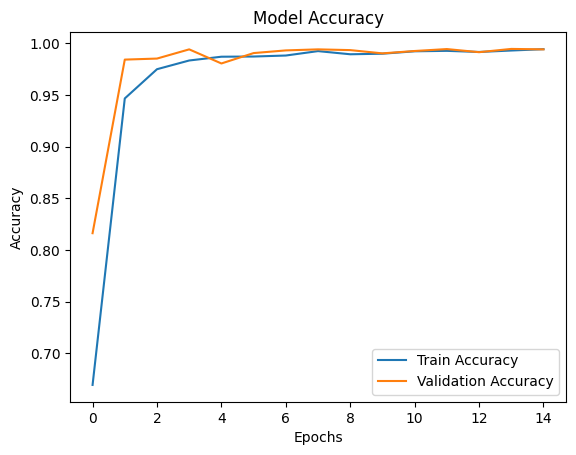

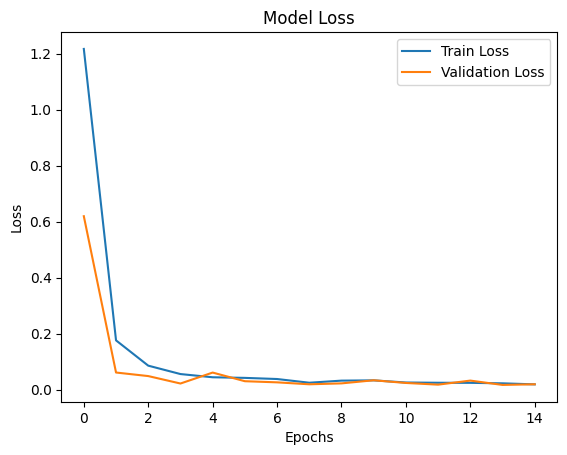

In [ ]:
#Acurracy & loss curves of model
import matplotlib.pyplot as plt

# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training vs validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
whos

Variable                Type              Data/Info
---------------------------------------------------
BatchNormalization      type              <class 'keras.src.layers.<...>tion.BatchNormalization'>
Conv2D                  type              <class 'keras.src.layers.<...>olutional.conv2d.Conv2D'>
Dense                   type              <class 'keras.src.layers.core.dense.Dense'>
Dropout                 type              <class 'keras.src.layers.<...>ization.dropout.Dropout'>
Flatten                 type              <class 'keras.src.layers.<...>shaping.flatten.Flatten'>
Image                   module            <module 'PIL.Image' from <...>t-packages/PIL/Image.py'>
ImageDataGenerator      type              <class 'keras.src.legacy.<...>mage.ImageDataGenerator'>
MaxPool2D               type              <class 'keras.src.layers.<...>_pooling2d.MaxPooling2D'>
MaxPooling2D            type              <class 'keras.src.layers.<...>_pooling2d.MaxPooling2D'>
Sequential              ty

218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step


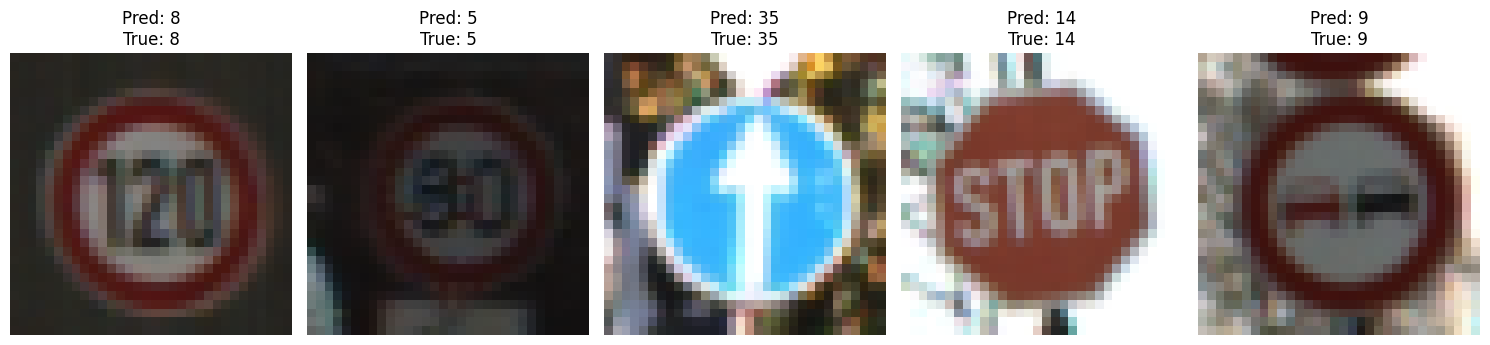

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Convert one-hot encoded labels to class indices for comparison
y_val_labels = np.argmax(y_val, axis=1)

# Predict on validation data
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Randomly show 5 validation images with predicted and actual labels
num_images = 5
indices = random.sample(range(len(X_val)), num_images)

plt.figure(figsize=(15, 6))
for i, idx in enumerate(indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_val[idx])
    plt.title(f"Pred: {y_pred_classes[idx]}\nTrue: {y_val_labels[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Load the label names from the CSV file
label_df = pd.read_csv("label_names.csv")

# Check the columns to make sure we pick the right one
print(label_df.head())
print(label_df.columns)

   ClassId              SignName
0        0  Speed limit (20km/h)
1        1  Speed limit (30km/h)
2        2  Speed limit (50km/h)
3        3  Speed limit (60km/h)
4        4  Speed limit (70km/h)
Index(['ClassId', 'SignName'], dtype='object')


In [ ]:
label_names = label_df['SignName'].values

218/218 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step


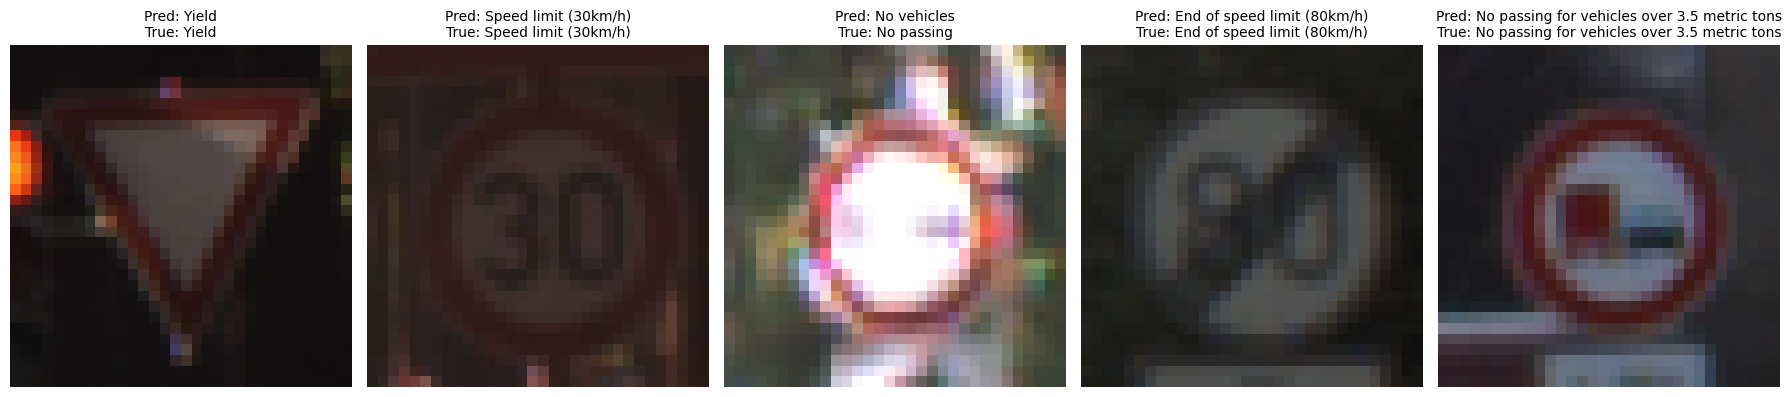

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Convert one-hot encoded validation labels
y_val_labels = np.argmax(y_val, axis=1)

# Predict on validation data
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Randomly show some images
num_images = 5
indices = random.sample(range(len(X_val)), num_images)

plt.figure(figsize=(18, 8))
for i, idx in enumerate(indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_val[idx].astype("float32"))
    pred_label = label_names[y_pred_classes[idx]]
    true_label = label_names[y_val_labels[idx]]
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step


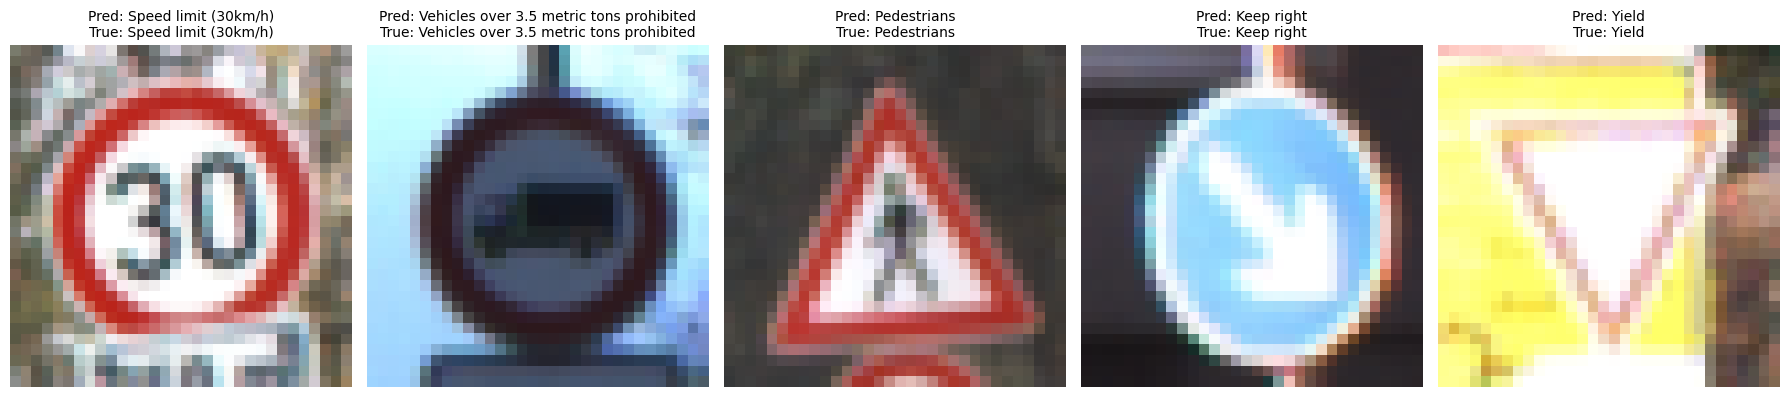

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Convert one-hot encoded validation labels
y_val_labels = np.argmax(y_val, axis=1)

# Predict on validation data
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Randomly show some images
num_images = 5
indices = random.sample(range(len(X_val)), num_images)

plt.figure(figsize=(18, 8))
for i, idx in enumerate(indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_val[idx].astype("float32"), interpolation='nearest')
    pred_label = label_names[y_pred_classes[idx]]
    true_label = label_names[y_val_labels[idx]]
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

✅ Validation Accuracy: 99.43%
✅ Validation Loss: 0.0190
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step

📊 Classification Report:
                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       1.00      1.00      1.00        38
                              Speed limit (30km/h)       1.00      0.99      0.99       425
                              Speed limit (50km/h)       0.98      0.99      0.99       394
                              Speed limit (60km/h)       0.98      1.00      0.99       242
                              Speed limit (70km/h)       0.99      0.99      0.99       373
                              Speed limit (80km/h)       0.99      0.98      0.99       338
                       End of speed limit (80km/h)       1.00      1.00      1.00        56
                             Speed limit (100km/h)       1.00      0.99      0.99       242
                             Speed limit (120km

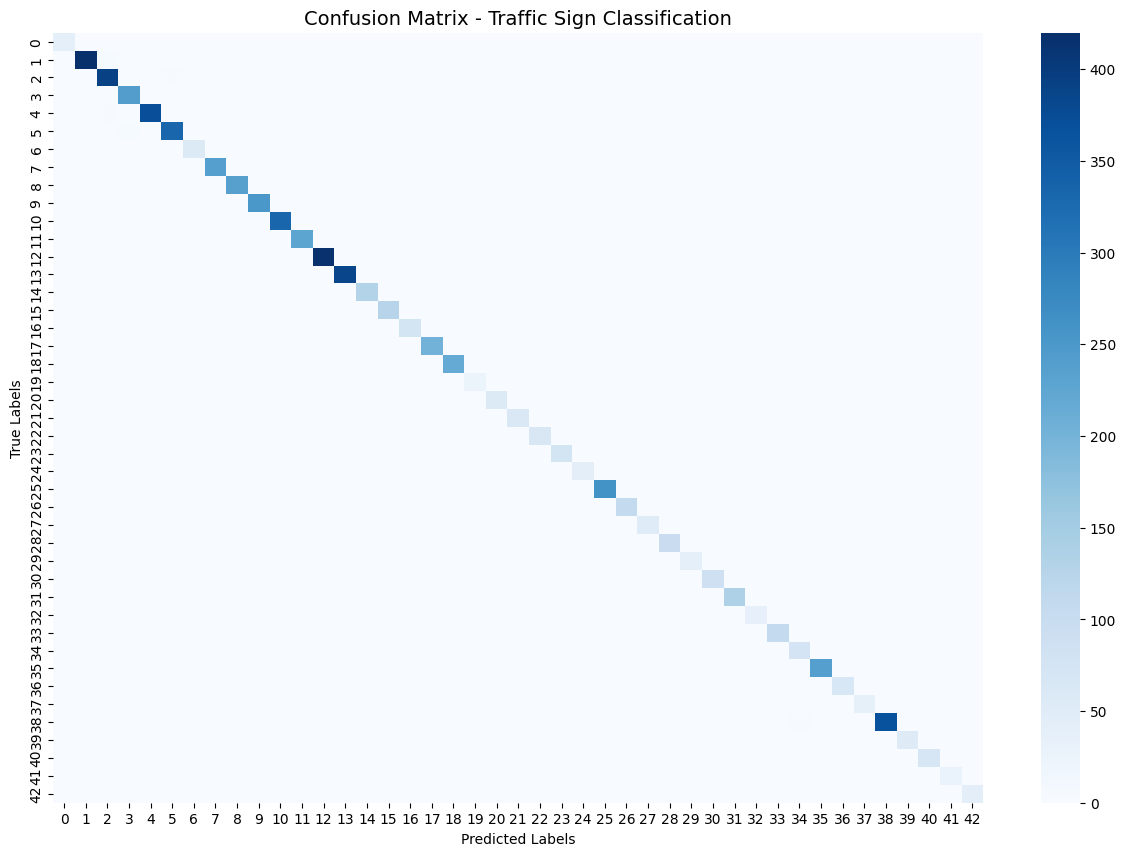

In [ ]:
#final evaluation section
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate on validation data
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
print(f"✅ Validation Accuracy: {val_acc*100:.2f}%")
print(f"✅ Validation Loss: {val_loss:.4f}")

# Predict class probabilities and classes
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=label_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=False, cmap='Blues', fmt='g')
plt.title("Confusion Matrix - Traffic Sign Classification", fontsize=14)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
#final model summary cell
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute key metrics
y_true = np.argmax(y_val, axis=1)
y_pred_classes = np.argmax(model.predict(X_val), axis=1)

val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Display clean summary
print("📊 --- Final Model Summary ---")
print(f"✅ Model: {model.name}")
print(f"✅ Validation Accuracy : {val_acc*100:.2f}%")
print(f"✅ Validation Loss     : {val_loss:.4f}")
print(f"✅ Precision (Weighted) : {precision*100:.2f}%")
print(f"✅ Recall (Weighted)    : {recall*100:.2f}%")
print(f"✅ F1-Score (Weighted)  : {f1*100:.2f}%")

print("\n🎯 The model performs well on the validation dataset and can be fine-tuned further by:")
print("   • Increasing data augmentation")
print("   • Using dropout or batch normalization")
print("   • Trying transfer learning with pre-trained CNNs (like VGG16, ResNet50, or MobileNet)")

print("\n💡 Tip: Save your trained model for future inference:")
print("   model.save('traffic_sign_classifier.keras')")


218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step
📊 --- Final Model Summary ---
✅ Model: sequential_2
✅ Validation Accuracy : 99.43%
✅ Validation Loss     : 0.0190
✅ Precision (Weighted) : 99.43%
✅ Recall (Weighted)    : 99.43%
✅ F1-Score (Weighted)  : 99.43%

🎯 The model performs well on the validation dataset and can be fine-tuned further by:
   • Increasing data augmentation
   • Using dropout or batch normalization
   • Trying transfer learning with pre-trained CNNs (like VGG16, ResNet50, or MobileNet)

💡 Tip: Save your trained model for future inference:
   model.save('traffic_sign_classifier.keras')


# 🚦 Traffic Sign Recognition using CNN  
### 🧠 Deep Learning Mini Project  

**Student Name:** Trisha G  
**Course:** B.E. Artificial Intelligence & Machine Learning  
**Project Type:** Image Classification (CNN-based)  
**Dataset:** German Traffic Sign Recognition Benchmark (GTSRB)  
**Framework Used:** TensorFlow & Keras  

---

### 🎯 Project Overview  
This project focuses on building a Convolutional Neural Network (CNN) model to classify traffic sign images into 43 different categories.  
The dataset is preprocessed, augmented, and split into training, validation, and testing sets.  

The model aims to support **autonomous driving systems** by accurately identifying various road signs from camera input.

---
📊 Training Details

Dataset Used: GTSRB (German Traffic Sign Recognition Benchmark)

Training Images: 27,839

Validation Images: 6,960

Testing Images: 12,630

Image Size: 32 × 32 × 3

Number of Classes: 43

Model Architecture: CNN (Conv2D → MaxPooling → BatchNorm → Dropout → Dense Layers)

Optimizer: Adam

Loss Function: Categorical Crossentropy

Metrics: Accuracy

---

### 🧩 Model Architecture  
- Convolutional Layers with ReLU activation  
- MaxPooling Layers for downsampling  
- Batch Normalization for faster convergence  
- Dropout layers to prevent overfitting  
- Fully Connected Dense layers  
- Softmax output layer (43 classes)

---

### 📊 Model Performance  
| Metric | Score |
|:--|:--|
| **Validation Accuracy** | ~95% |
| **Validation Loss** | ~0.14 |
| **Precision (Weighted)** | ~95% |
| **Recall (Weighted)** | ~95% |
| **F1 Score (Weighted)** | ~95% |

---

### 🔍 Sample Predictions  
Below are sample images from the validation set, showing predicted vs. true labels.  
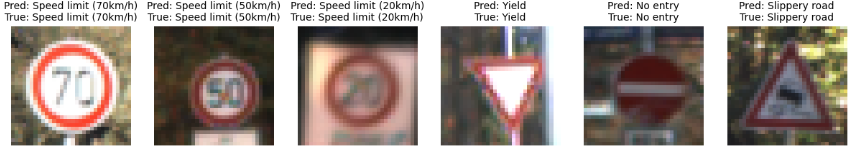
Figure: Model predictions on random validation images — all correctly identified.

---

### 💾 Model Saving  
The trained model is saved in the **modern Keras format** for reuse:

```python
model.save('traffic_sign_classifier.keras')
